<a href="https://colab.research.google.com/github/KOCORA/The-architecture-of-artificial-intelligence-systems./blob/master/Costumer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **BUILDING A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN** 

### **ПОСТРОЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ (CUSTOMER CHURN)**

### **CONSTRUCTION D'UN MODELE DE MACHINE LEARNING POUR PREDIRE LE DESABONNEMENT DES CLIENS D'UNE ENTREPRISE (CUSTOMER CHURN)**

Customer churn (This is customer churn in a business, supermarket or store.)

Customer churn occurs when a customer decides to stop using a company's services, content or products. There are many examples and instances of churn:

* Cancellation of a contracted or uncontracted service;
* Purchase from another competing store;
* Unsubscribing from a newsletter;
* Closing a bank account;
* Etc...

In this business world where a company faces many competitors, the cost of acquiring new customers is very high. Therefore, the retention of existing customers is more important for companies. Therefore, the company must better understand the behavior of its customers in order to retain them. One way to do this is to create a Machine Learning or artificial neural network model that can predict which customers are likely to churn. This allows the company to better target and retain those specific customers who are at a higher risk of churn.

In this project, we will explore a dataset from a telecommunications company and create a model to predict which customers are at higher risk of churn. We will use different Machine Learning algorithms to compare their performance and then choose the best model.

*************

Customer churn (Это отток клиентов в бизнесе, супермаркете или магазине).

Отток клиентов происходит, когда клиент решает прекратить пользоваться услугами, контентом или продуктами компании. Существует множество примеров и случаев оттока:

* Отказ от услуг по контракту или без него;
* Покупка в магазине другого конкурента;
* Отказ от подписки на рассылку новостей;
* Закрытие банковского счета;
* и т.д.

В мире бизнеса, где компания сталкивается с множеством конкурентов, затраты на привлечение новых клиентов очень высоки. Поэтому удержание существующих клиентов становится более важным для компаний. Поэтому компании необходимо лучше понять поведение своих клиентов, чтобы удержать их. Один из способов сделать это - создать модель машинного обучения или искусственной нейронной сети, которая может предсказать, какие клиенты, скорее всего, будут отходить. Это позволит компании лучше ориентироваться и удерживать тех конкретных клиентов, которые подвержены повышенному риску оттока.

В этом проекте мы изучим набор данных телекоммуникационной компании и создадим модель для прогнозирования того, какие клиенты подвержены повышенному риску оттока. Мы будем использовать различные алгоритмы машинного обучения, чтобы сравнить их производительность и затем выбрать лучшую модель.

## Importation des outils nécessaires

In [297]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# Importation des données

Nous allons télécharger les données sur Kaggle. 

In [298]:
#Importation des données.

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Description des variables

*   **CustomerID** : L'identifiant unique de chaque client dans la base de données.
*   **Gender** : Le genre du client (masculin ou féminin).
*   **SeniorCitizen** : Indique si le client est un citoyen senior ou non.
*   **Partner** : Indique si le client a un partenaire ou non.
*   **Dependents** : Indique si le client a des personnes à charge ou non.
*   **Tenure** : Le nombre de mois pendant lesquels le client a été abonné à la compagnie de télécommunications.
*   **PhoneService** : Indique si le client a un service de téléphone ou non.
*   **MultipleLines** : Indique si le client a plusieurs lignes téléphoniques ou non.
*   **InternetService** : Indique le type de service Internet que le client utilise (DSL, fibre optique, aucun service).
*   **OnlineSecurity** : Indique si le client a un service de sécurité en ligne ou non.
*   **OnlineBackup** : Indique si le client a un service de sauvegarde en ligne ou non.
*   **DeviceProtection** : Indique si le client a un service de protection de l'appareil ou non.
*   **TechSupport** : Indique si le client a un service de support technique ou non.
*   **StreamingTV** : Indique si le client a un service de télévision en streaming ou non.
*   **StreamingMovies** : Indique si le client a un service de films en streaming ou non.
*   **Contract** : Indique le type de contrat que le client a avec la compagnie de télécommunications (mensuel, annuel, deux ans).
*   **PaperlessBilling** : Indique si le client utilise une facturation sans papier ou non.
*   **PaymentMethod** : Indique le mode de paiement que le client utilise (virement bancaire, carte de crédit, chèque électronique, paiement automatique).
*  **MonthlyCharges**: Le montant mensuel que le client doit payer pour les services de télécommunication.
*   **TotalCharges**: Le montant total que le client a payé pour les services de télécommunication depuis son inscription. 
*   **Churn** : Indique si le client s'est désabonné ou non de la compagnie de télécommunications.

Notons que la variable cible est la variable **Churn** qui prends deux valeurs : Yes (le client s’est désabonné) et No (le client ne s’est pas désabonné). 

In [299]:
#Information sur l'ensemble des données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparemment, il n'y a pas de valeurs manquantes. Mais les valeurs manquantes peuvent être cachées. L'analyse exploratoire des données nous donnera beaucoup plus d'informations sur les données.

In [300]:
#nombre de valeurs uniques par colonne

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Etant donné que la variable customerID (identifiant du client) a 7043 valeurs distinctes et que la dataframe contient au total 7043 lignes, alors nous sommes convaincus que chaque ligne de l'ensemble des données répresente un unique client.

Effectuons une analyse exploratoire des données afin de mieux les comprendre.

# Analyse exploratoire des données

Commençons notre exploratoire des données en traçant un graphique de visualisation de la distribution de chaque variable.

In [301]:
from pandas.core.arrays import categorical
# variables catégoricielles
 
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()

categorical_columns   #Il repertories les variables categoricielles qui ont plus de 5 valeurs uniques

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [302]:
# Création d'une fonction de construction de graphiques à barres et de manière interactive.

def bar_plot(a):
  df[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution of ' + str(a))
  return plt.show

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

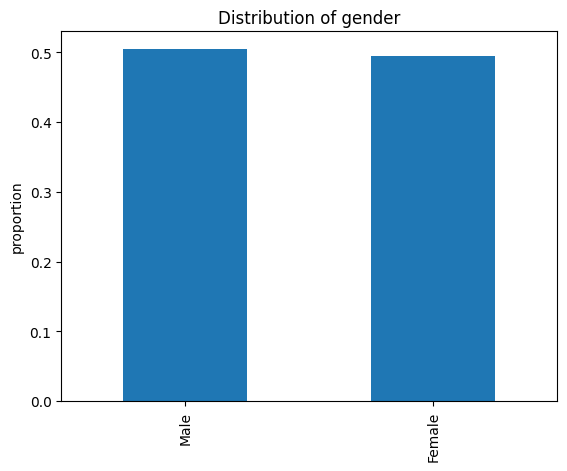

In [303]:
# Interact

interact(bar_plot, a = categorical_columns);

Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus:

*   Il y a plus de clients qui se sont désabonnés (plus de 70%) que de clients qui se sont désabonné (moins de 30%). Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire.

In [304]:
# Echantillonnement aléatoire de la variable 'TotalCharges'

df['TotalCharges'].sample(15)

2648     2094.9
2817     875.55
227        55.2
558      760.05
6235      880.2
3696      270.8
5542    5883.85
851     4461.85
3107    8182.75
1324      76.35
3786       1929
2022     1340.1
423      1110.5
6744    7110.75
3967      593.2
Name: TotalCharges, dtype: object

Apparemment c'est à cause de la présence d'espce ua niveay de la variable ***TotalCharges*** que Pandas la considère comme une variables avec des valeurs de type *object* (chaîne de caractère).
Pour resoudre ce problème, nous allons remplacer ces espaces par des NaN et transformer le type de ses valeurs en *float*

In [305]:
# Variables quantitatives

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Création d'une fonction de construction d'histogrammes et de manière interactive

def hist_plot(b):
  sns.distplot(df[b], kde=False)
  plt.title('Histogram of '+str(b))
  return plt.show()

# Conversion du type des valeurs de la variable 'TotalCharges' en float

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [306]:
# Interact
interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

In [307]:
# Coefficient d'asymétrie de la variable 'TotalCharges'

df['TotalCharges'].skew()

0.961642499724251

In [308]:
# Creation d'une fonction de construction de boîtes à moustaches et de manière interactive
def box_plot(b):
  sns.boxplot(y = df[b])
  plt.title('Boxplot of ' + str(b))
  return plt.show()

# Interact

interact(box_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

Nous pouvons conclure qu'il n'y a pas de valeurs abérrantes (outliers). Mais ces valeurs asymétriques peuvent causer des erreurs au niveau des modèles que nous allons construire. Pour cela, nous allons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.

Analyse bivariées

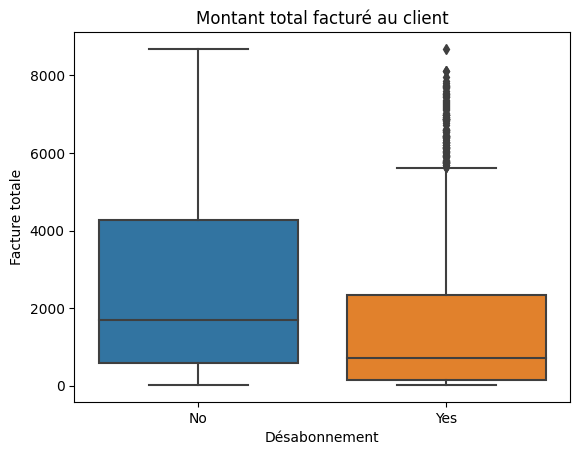

In [309]:
# TotalCharges vs Churn

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture totale')
plt.title('Montant total facturé au client')
plt.show()

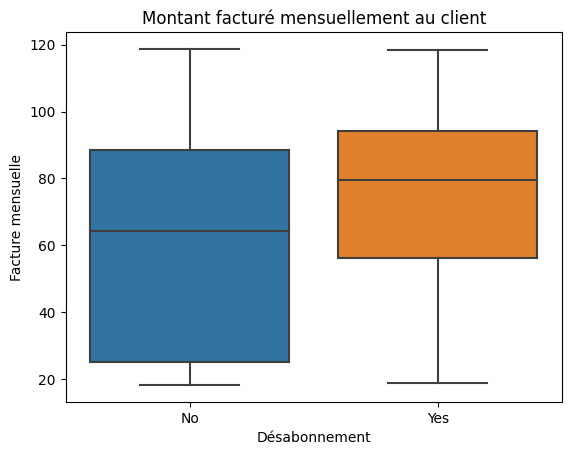

In [310]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. Mais les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui se sont désabonnées. Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut-être un facteur important qui détermine si un client va se désabonner ou non

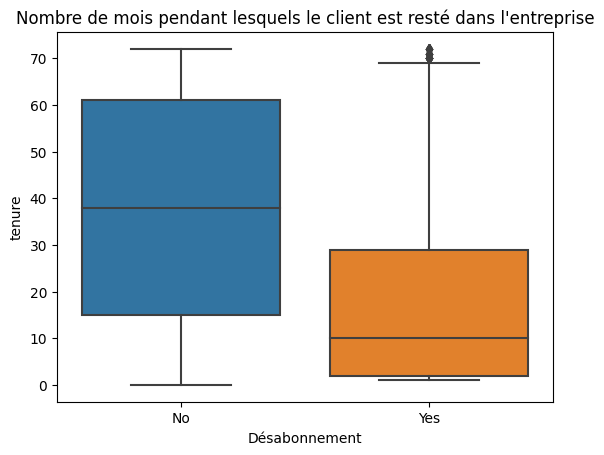

In [311]:
# Tenure vs Churn

sns.boxplot(x='Churn', y='tenure', data=df)
plt.xlabel('Désabonnement') 
plt.title("Nombre de mois pendant lesquels le client est resté dans l'entreprise")
plt.show()

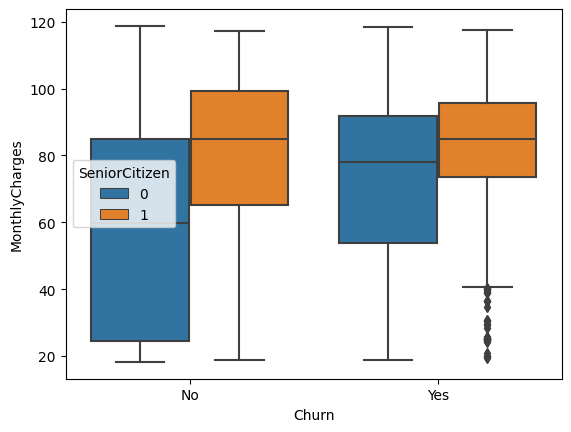

In [312]:
# MonthlyCharges vs Churn by SeniorCitizen

sns.boxplot(x ='Churn', y ='MonthlyCharges', data=df, hue = 'SeniorCitizen');

Il semble que les personnew âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgrés cela, il restent plus fidèles à l'entreprise que les jeunes.

In [313]:
# Résumé statistique

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Prétraitement des données

In [314]:
# Gestion des valeurs manquantes

data = df.copy()

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nous constatons qu'il y a 11 valeurs manquantes dans la variable *MonthlyCharges*. Nous allons supprimer ces valeurs manquantes.

In [315]:
# Suppression des valeurs manquantes

data.dropna(inplace=True)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [316]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [317]:
# Encodages des variables binaires

data['gender'] = data['gender'].apply(lambda row: 1 if row == 'female' else 0)

binairy_columns = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()

binairy_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [318]:
# Nous avons trouvé les variables binaires. Maintenant nous les encodons.

for column in binairy_columns:
  data[column] = data[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [319]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [320]:
# Encodages des variables catégoricielles restantes

encoding_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()

encoding_cat_vars_dummies = pd.get_dummies(data=data[encoding_cat_vars], columns=encoding_cat_vars, drop_first=True)

In [321]:
# Nouvelle dataframe

data = pd.concat([data['gender'], data[binairy_columns], encoding_cat_vars_dummies, data[numerical_columns]], axis=1)

In [322]:
# Affichage de la nouvelle dataframe

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


Nous avons vu que la variable *TotalCharges* est très asymétriques alors transformons-la par une fonction racine carrée

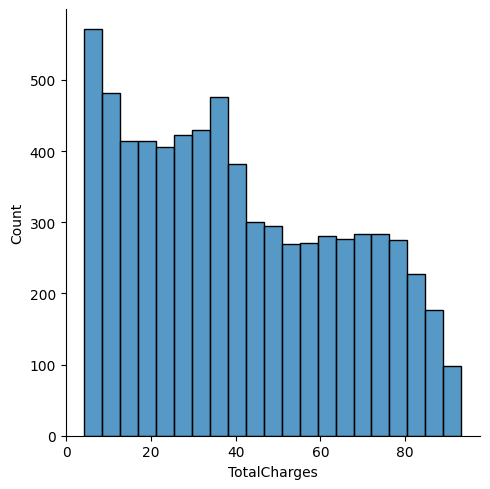

In [323]:
# Transformation de la variable 'TotalCharges'

data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Histogramme de la variables transformées

sns.displot(data['TotalCharges'], kde=False)

In [324]:
# Coefficient d'asymétrie de la variable 'TotalCharges' après transformation

data['TotalCharges'].skew()

0.3089261418986736

In [325]:
# Données d'entraîment 60%, de validation 20% et de test 20%

X = data.drop('Churn', axis = 1)
y = data['Churn']
seed=25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contact soient les mêmes dans les différents ensembles de données.

In [326]:
# Fréquence des classes dans y_train

pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.734297
1        0.265703
dtype: float64

In [327]:
# Fréquence des classes dans y_val

pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.733997
1        0.266003
dtype: float64

In [328]:
# Fréquence des classes dans y_test

pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.734186
1        0.265814
dtype: float64

Nous allons résoudre maintenant le problème de déséquilibre de classe dans les données.
Lorsqu'il a une très grande différence entre le nombre d'observations dans chaque catégorie de variable cible à orédire, cela peut entraîner des erreurs de modélisation.

Dans notre cas ici, il y a un peu plus de 73% de personnes qui n'ont pas résilié leur abonnement contre un peu plus de 26% environ qui ont résilié leur abonnement. Il y a donc un grand déséquilibre de classe. Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégorie de la variable cible. Soit on crée plus d'observations dans la classe minoritaire (modalité 1) c'est-à-dire on fait un sur-échantillonnage, soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire un sous échantillonnage.

In [329]:
# Résolution du problème de déséquilibre de classe : Méthode de sur-échantillonnage de la classe 

X2 = X_train
X2['Churn'] = y_train
minority = X2[X2.Churn == 1]
majority = X2[X2.Churn == 0]

minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state=seed)

upsampled = pd.concat([majority, minority_upsampled])

upsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
483,0,0,1,0,1,1,0,1,1,0,...,1,1,0,0,0,0,72,108.50,89.463959,0
845,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,15,20.55,17.203197,0
3056,0,0,1,1,1,1,0,1,0,0,...,0,0,1,1,0,0,50,70.50,59.047862,0
2778,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,13,74.65,31.084562,0
6586,0,0,1,1,1,1,0,1,0,1,...,0,0,1,1,0,0,45,24.65,34.224260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,1,0,10,85.60,28.528056,1
1836,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,24,96.00,46.070055,1
6924,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,69.35,8.327665,1
1362,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,4,70.20,15.425628,1


In [330]:
# Vérification

upsampled['Churn'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [331]:
# Données d'entraînement sur la base de la méthode de sur-échantillonanage de la classe minoritaire

X_train_up = upsampled.drop('Churn', axis = 1)

y_train_up = upsampled['Churn']

In [332]:
# Résolution du problème de déséquilibre de classe : Méthode de sous-échantillonnage de la classe majoritaire

majority_downsampled = resample(majority, replace = False, n_samples = len(minority), random_state=seed)

downsampled = pd.concat([minority, majority_downsampled])

downsampled


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
3200,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,1,0,54,104.30,72.650877,1
6176,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,43,77.85,58.015946,1
2175,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,30,85.15,50.555910,1
1486,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,2,55.05,10.136567,1
2074,0,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,43,108.15,67.828460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,0,0,1,1,1,1,0,1,1,0,...,1,0,0,0,1,0,46,110.20,70.513119,0
6788,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,25,20.80,21.452273,0
3441,0,0,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,34,60.80,45.189047,0
1231,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,20,64.40,37.397861,0


In [333]:
# Vérification

downsampled['Churn'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [334]:
# Données d'entraînement sur la base de la méthode de sous-échantillonanage de la classe minoritaire

X_train_down = upsampled.drop('Churn', axis = 1)

y_train_down = upsampled['Churn']

In [335]:
# X_train et y_train

#X_train = X_train.drop('Churn', axis=1)

#y_train = X_train['Churn']

In [336]:
# Définition des données d'entraînement
# Choix possibles : (X_train, y_train), (X_train_up, y_train_up) et (X_train_down, y_train_down)

train_features = X_train_up

train_labels = y_train_up

Passons finalement à la modélisation des données

In [337]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
483,0,0,1,0,1,1,0,1,1,0,...,0,1,1,0,0,0,0,72,108.50,89.463959
845,0,0,1,1,1,0,0,0,0,1,...,1,0,1,0,0,0,1,15,20.55,17.203197
3056,0,0,1,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,50,70.50,59.047862
2778,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,13,74.65,31.084562
6586,0,0,1,1,1,1,0,1,0,1,...,1,0,0,1,1,0,0,45,24.65,34.224260


In [338]:
# Standardisation des variables indépendantes des différents ensembles de données

scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

# Retransformation en DataFrame

train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [339]:
train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.0,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.0,0.0,0.449645,0.266301,0.908489,0.640897,0.091511,0.443028,0.534377,0.164945,...,0.164945,0.412201,0.177534,0.169464,0.187056,0.413815,0.202873,0.384430,0.500938,0.388687
std,0.0,0.0,0.497498,0.442059,0.288357,0.479776,0.288357,0.496784,0.498857,0.371161,...,0.371161,0.492271,0.382151,0.375192,0.389988,0.492556,0.402171,0.334552,0.287114,0.273843
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070423,0.276119,0.146499
50%,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309859,0.565672,0.350788
75%,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.676056,0.728856,0.600870
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Modélsation**

**Quelle métrique choisir pour évaluer la performance des modèles ?**

In [340]:
 # Selection des meilleures variables prédictrices

rf = RandomForestClassifier() 

rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1032
           1       0.60      0.58      0.59       374

    accuracy                           0.79      1406
   macro avg       0.73      0.72      0.72      1406
weighted avg       0.78      0.79      0.78      1406



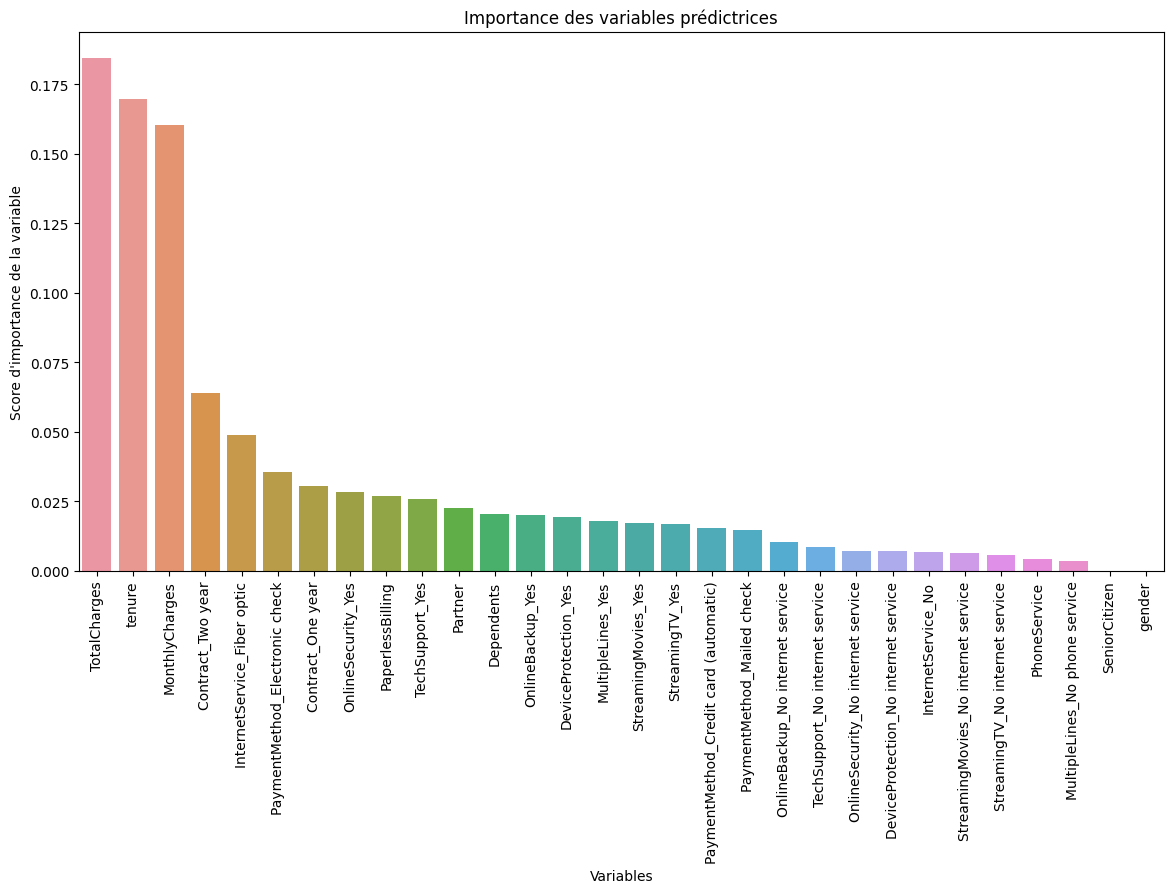

In [341]:
# Importance des variables indépendantes

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x = vars_imp.index, y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables prédictrices")
plt.show()

In [342]:
# Affiche de vars_imps

vars_imp


TotalCharges                             0.184558
tenure                                   0.169594
MonthlyCharges                           0.160243
Contract_Two year                        0.063899
InternetService_Fiber optic              0.048914
PaymentMethod_Electronic check           0.035532
Contract_One year                        0.030445
OnlineSecurity_Yes                       0.028338
PaperlessBilling                         0.026928
TechSupport_Yes                          0.025945
Partner                                  0.022775
Dependents                               0.020316
OnlineBackup_Yes                         0.020073
DeviceProtection_Yes                     0.019439
MultipleLines_Yes                        0.018063
StreamingMovies_Yes                      0.017311
StreamingTV_Yes                          0.016842
PaymentMethod_Credit card (automatic)    0.015558
PaymentMethod_Mailed check               0.014822
OnlineBackup_No internet service         0.010584


In [343]:
# Variables sélectionnées pour les algoritmes

seuil = 0.009
vars_selected = vars_imp[vars_imp > seuil].index.to_list()
train_features = train_features[vars_selected]

X_val = X_val[vars_selected]
X_test = X_test[vars_selected]

In [344]:
# Nombre de variables prédictrices

len(train_features.columns)

20

Notre objectif est de construire un modèle de classification qui prédit si un client va se désabonner ou non. Nous utiliserons différents algorithmes (Logistic Regression, Random Forest, Gradient Boosting, Classificateur Perceptron Multicouche et Support Vector Machine = SVM) afin de comparer leurs performances et de choisir le meilleur modèle.

**Modèle de Régression logistique**

In [345]:
# Dictionnaire des hyperparamètres

param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

# Objet GridSearchCV

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), 
                                 param_grid=param_grid, 
                                 scoring='f1', cv=5)

# Entraînement de l'algorithme

logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre

print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.78
LogisticRegression(C=10, max_iter=500, random_state=25)


Le modèle à un bon score d'entraînement. Evaluons sa performance sur les données de validation afin d'apprécier sa capacité à généraliser sur de nouvelles données.

In [346]:
# Fonction d'évaluation de la performance d'un modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  print(classification_report(labels, pred))

In [347]:
# Evaluation d'un modèle de régression logistique

model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1032
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1406
   macro avg       0.72      0.77      0.72      1406
weighted avg       0.81      0.75      0.76      1406



Appliquons l'algortihme Recursive Feature Eliminator (RFE) sur le modèle afin de voir s'il garde des mêmes performances lorsqu'on réduit le nombre de prédicteurs. en effet, plus le modèle est complexe, plus il est difficile de l'interpréter.

In [348]:
# Création d'une focntion de construction d'un modèle avec l'utilisation de l'algortihme RFE

def model_with_rfe(model):
  rfe_model = RFE(estimator=model, verbose=0)
  rfe_model.fit(train_features, train_labels)
  mask = rfe_model.support_
  reduce_X = train_features.loc[:, mask]
  return rfe_model

In [349]:
# Logistic Regression RFE

rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)

rfe_logreg_model

RFE(estimator=LogisticRegression(C=10, max_iter=500, random_state=25))

In [350]:
# Evaluation du modèle de régression logistic avec RFE

model_evaluation(rfe_logreg_model, X_val, y_val)


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1032
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1406
   macro avg       0.71      0.77      0.72      1406
weighted avg       0.81      0.75      0.76      1406



Le RFE a réduit le nombre de prédicateurs de 28 à 14 et n'a pas améliore la performance du modèle.

Passons à l'algorithme de forêt aléatoire.

## Modèle de Forêt aléatoire 

In [352]:
# Dictionnaire des hyperparamètres

param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000], 'max_depth':[3, 5, 10, 20, None]}

# Objet GridSearchCv

grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed),
                             param_grid = param_grid_rf,
                             scoring='f1',
                             cv=5)

# Entraînement de l'algorithme

rf_model = grid_rf_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre

print(round(rf_model.best_score_, 3))
print(rf_model.best_estimator_)

0.902
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=25)


In [353]:
# Evaluation du modèle de forêt aléatoire

model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1032
           1       0.59      0.60      0.59       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



Comparé aux valeurs du modèle de regression logistique, le modèle de forêt aléatoire semble moins efficace.

Appliquons une RFE.

In [354]:
# Random Forest avec RFE

rfe_forest_model = model_with_rfe(rf_model.best_estimator_)
rfe_forest_model

RFE(estimator=RandomForestClassifier(max_depth=20, n_estimators=50,
                                     random_state=25))

In [356]:
# Evaluation du modèle de forêt aléatoire avec RFE

model_evaluation(rfe_forest_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1032
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1406
   macro avg       0.71      0.72      0.71      1406
weighted avg       0.78      0.77      0.77      1406



Au vue de ces valeurs, nous retiendrons le modèle de forêt aléatoires obtenu sans RFE. 

Passons à la construction d'un modèle de réseau de neuronne artificiel.

## Classificateur Perceptron multicouche

In [360]:
from seaborn.axisgrid import Grid
from sklearn.neural_network import MLPClassifier
# MLPClassifier

mlp = MLPClassifier(random_state=seed, max_iter=1000)
parameters = {'hidden_layer_sizes':[(50,), (100,), (200,)], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'learning_rate':['constant', 'invscaling', 'adoptive']}

mlp_cv = GridSearchCV(mlp, parameters, scoring='f1', cv=5)

mlp_cv.fit(train_features, train_labels) 


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=25),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adoptive']},
             scoring='f1')

In [362]:
# Meilleur score et meilleur hyperparamètre

round(mlp_cv.best_score_, 3)

0.849

In [363]:
# Evaluation du modèle Perceptron
model_evaluation(mlp_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1032
           1       0.51      0.64      0.57       374

    accuracy                           0.74      1406
   macro avg       0.68      0.71      0.69      1406
weighted avg       0.76      0.74      0.75      1406



Passons maintenant au SVM

## Support Vector Machine

In [364]:
# Support Vector Machine : Classifieur qui trouve l'hyperplan optimal qui maximise la frontière entre 2 classes

svm_model = SVC(random_state=seed)

svm_hyp = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svm_hyp, scoring='f1', cv=5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))

print(svm_cv.best_estimator_)

0.846
SVC(C=50, random_state=25)


In [365]:
# Evaluation du modèle SVM

model_evaluation(svm_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1032
           1       0.48      0.64      0.55       374

    accuracy                           0.72      1406
   macro avg       0.67      0.70      0.67      1406
weighted avg       0.75      0.72      0.73      1406



# **A la suite de ces modèles entraîné et évalué, nous pouvons retenir le modèle de Logistic Linéaire.**

In [361]:
model_evaluation(logreg_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1032
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1406
   macro avg       0.72      0.77      0.72      1406
weighted avg       0.81      0.75      0.76      1406



In [366]:
model_evaluation(logreg_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.76      1407

